In [62]:
import tensorflow as tf
from tensorflow import keras

In [63]:
tf.version.VERSION

'2.6.0'

In [64]:
test_model = tf.keras.models.load_model('./place_rec.h5')
test_model.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x000001FD16924888>>

In [65]:
test_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 66, 66, 64)   0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [66]:
import numpy as np

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
def prepareImage(file):
    img_path = './what_u_lookin_at/'
    img = image.load_img(img_path+file, target_size=(128,128));
    img = img.convert("RGB")
    img_array = image.img_to_array(img)
    img_array = img_array.astype(float) / 255
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return img_array_expanded_dims
    # return tf.keras.applications.resnet_v2.preprocess_input(img_array_expanded_dims)



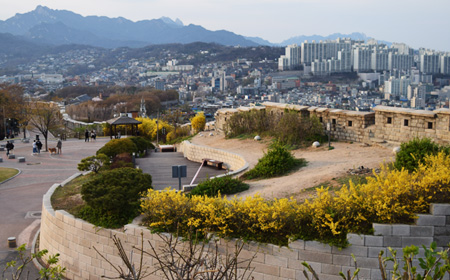

In [67]:
from IPython.display import Image
Image(filename = './what_u_lookin_at/nak01.jpg', width=300, height= 200)

In [68]:
preprocessed_image = prepareImage("nak01.jpg")
predictions = test_model.predict(preprocessed_image)
predictions

array([[1.17215166e-06, 5.26292773e-04, 9.95926738e-01, 4.81392874e-07,
        1.12333176e-07, 7.23688043e-09, 1.29373402e-05, 7.25309377e-08,
        9.87142312e-12, 3.53211793e-03]], dtype=float32)

In [69]:
categories = ["Dongdaemun_Design_Plaza", "Gyeongui_Line_Forest_Park", "Naksan_Park", "Namsan_Seoul_Tower","The_Hyundai_Seoul_Mall", 
              "Myeongdong_Cathedral", "Ikseon_Dong_Hanok_Village", "Jamsil_Lotte_Tower", "Han_River_Sebitseom", "Haebangchon"]

In [70]:
categories[5]

'Myeongdong_Cathedral'